In [65]:
import pandas as pd
import seaborn as sns

In [66]:
df_planets = sns.load_dataset('planets')

In [68]:
df_iris = sns.load_dataset('iris')

In [5]:
display(df_planets.shape)
display(df_planets.head())
display(df_planets.describe())

(1035, 6)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [9]:
df_planets.groupby('year').sum()

,number,orbital_period,mass,distance
year,,,,
1989,1,83.888000,11.68000,40.57
1992,6,91.803900,0.00000,0.00
1994,3,98.211400,0.00000,0.00
1995,1,4.230785,0.47200,15.36
1996,15,2015.769933,7.91760,95.20
1997,1,39.845000,1.04000,17.43
1998,11,571.553306,13.43560,131.51
1999,24,8284.213789,45.31300,464.21
2000,27,8655.125170,50.86220,492.04


<AxesSubplot:xlabel='year'>

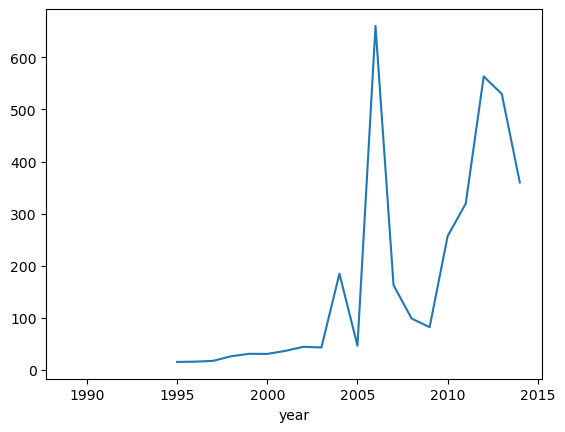

In [10]:
df_planets.groupby('year')['distance'].mean().plot()

<AxesSubplot:xlabel='year'>

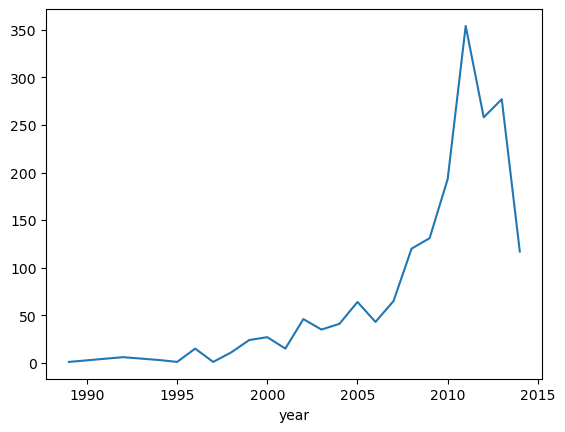

In [17]:
df_planets.groupby('year')['number'].sum().plot()

<AxesSubplot:xlabel='year'>

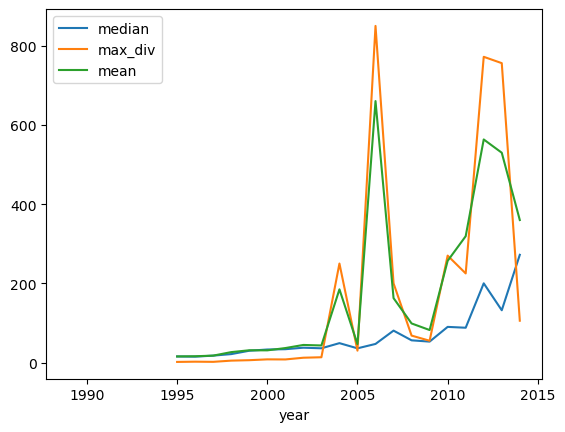

In [19]:
# meerdere aggregates in 1 grafiek
def max_div(x):
    return x.max() / 10   # op deze manier gebruik je Pandas 'max' is performanter dan return max(x) / 10

df_planets.groupby('year')['distance'].aggregate(['median', max_div, 'mean']).plot()

<AxesSubplot:xlabel='year'>

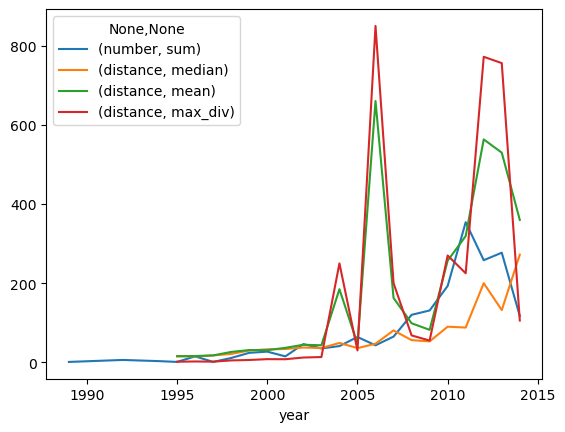

In [26]:
df_planets.groupby('year').agg({
    'number': 'sum', 
    'distance': ['median', 'mean', max_div]
}).plot()

In [27]:
df_planets.groupby('year').agg({
    'number': 'sum', 
    'distance': ['median', 'mean', max_div]
}).columns   # resultaat = dataframe met multi-index

MultiIndex([(  'number',     'sum'),
            ('distance',  'median'),
            ('distance',    'mean'),
            ('distance', 'max_div')],
           )

In [36]:
df_planets.groupby('year')['number'].sum()

year
1989      1
1992      6
1994      3
1995      1
1996     15
1997      1
1998     11
1999     24
2000     27
2001     15
2002     46
2003     35
2004     41
2005     64
2006     43
2007     65
2008    120
2009    131
2010    193
2011    354
2012    258
2013    277
2014    117
Name: number, dtype: int64

In [75]:
for i, j in df_planets.groupby('year')['number'].sum().iteritems():
    print(f"In {i} we observed {j} planets.")

In 1989 we observed 1 planets.
In 1992 we observed 6 planets.
In 1994 we observed 3 planets.
In 1995 we observed 1 planets.
In 1996 we observed 15 planets.
In 1997 we observed 1 planets.
In 1998 we observed 11 planets.
In 1999 we observed 24 planets.
In 2000 we observed 27 planets.
In 2001 we observed 15 planets.
In 2002 we observed 46 planets.
In 2003 we observed 35 planets.
In 2004 we observed 41 planets.
In 2005 we observed 64 planets.
In 2006 we observed 43 planets.
In 2007 we observed 65 planets.
In 2008 we observed 120 planets.
In 2009 we observed 131 planets.
In 2010 we observed 193 planets.
In 2011 we observed 354 planets.
In 2012 we observed 258 planets.
In 2013 we observed 277 planets.
In 2014 we observed 117 planets.


In [54]:
df_planets.groupby('year').filter(lambda x: (x['distance'].mean() > 45))

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [70]:
df = df_iris.head(5).copy()
df = pd.concat([df, df_iris.iloc[50:55]])
df = pd.concat([df, df_iris.iloc[100:105]])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [73]:
df.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,24.3,16.4,7.0,1.0
versicolor,32.3,14.6,22.7,7.2
virginica,32.0,14.9,28.4,10.5


In [74]:
def fun(data):
    return data.sum()

df.groupby('species').apply(fun)   # Voert som ook uit op string in kolom 'species'

,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,
setosa,24.3,16.4,7.0,1.0,setosasetosasetosasetosasetosa
versicolor,32.3,14.6,22.7,7.2,versicolorversicolorversicolorversicolorversic...
virginica,32.0,14.9,28.4,10.5,virginicavirginicavirginicavirginicavirginica


In [82]:
df.set_index('species')

KeyError: "None of ['species'] are in the columns"

In [85]:
df.groupby({'setosa' : 'setosa/versicolor', 'versicolor' : 'setosa/versicolor', 'virginica' : 'virginica'}).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa/versicolor,5.66,3.10,2.97,0.82
virginica,6.40,2.98,5.68,2.10


In [90]:
def decade(year):
    return(str(year)[0:3] + '0s')

In [91]:
display(decade(1988))


'1980s'

In [ ]:
df_planets['decade'] = df